<a href="https://colab.research.google.com/github/maryantonopoulou/teliki_ergasia_EDDE2/blob/main/Heatmap_%CE%BA%CE%B1%CE%B9_%CE%B1%CF%80%CF%8C_%CF%84%CE%B9%CF%82_5_%CE%B9%CF%83%CF%84%CE%BF%CF%83%CE%B5%CE%BB%CE%AF%CE%B4%CE%B5%CF%82_%CE%B1%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paradf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikaparapolitika.csv')
paradf['origin'] = 'Παραπολιτικά'
avdf=pd.read_csv("/content/drive/MyDrive/CSVFILES/filtered_ergatikaathensvoice.csv")
avdf['origin'] = 'Athens Voice'
nbdf=pd.read_csv("/content/drive/MyDrive/CSVFILES/filtered_ergatikanewsbomb.csv")
nbdf['origin'] = 'Newsbomb'
ktdf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikakathimerini.csv')
ktdf['origin'] = 'Καθημερινή'
nfdf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikanaftemboriki.csv')
nfdf['origin'] = 'Ναυτεμπορική'
ktdf['origin'] = 'Καθημερινη'

In [ ]:
combined_df = pd.concat([paradf, avdf,nbdf,ktdf,nfdf] ,ignore_index=True)

In [ ]:
print(combined_df.head())
print(combined_df.dtypes)

                                         article_url  \
0  https://www.parapolitika.gr/ellada/article/327...   
1  https://www.parapolitika.gr/ellada/article/304...   
2  https://www.parapolitika.gr/ellada/article/275...   
3  https://www.parapolitika.gr/parapolitika-tv/ar...   
4  https://www.parapolitika.gr/ellada/article/259...   

                                              title        date      time  \
0                      Εργατικό ατύχημα στην Πυλαία  2018-09-13  08:41:00   
1                       Εργατικό ατύχημα στην Κνωσό  2018-03-21  10:39:00   
2                    Εργατικό ατύχημα στην Ελευσίνα  2017-08-31  04:58:00   
3  Ο Γολγοθάς της σύνταξης μετά το εργατικό ατύχημα  2021-11-25  11:55:17   
4      Εργατικό ατύχημα στα Χανιά με έναν τραυματία  2017-05-12  04:52:00   

  section                 author  \
0  ΕΛΛΑΔΑ  Parapolitika Newsroom   
1  ΕΛΛΑΔΑ  Parapolitika Newsroom   
2  ΕΛΛΑΔΑ  Parapolitika Newsroom   
3     NaN                    NaN   
4  ΕΛΛΑΔΑ  Parapolit

In [ ]:
#μετατροπή  'date' column σε  datetime
# με μρφή '%Y-%m-%d'
combined_df['datetime'] = pd.to_datetime(combined_df['date'], format='%Y-%m-%d')

# μικρότερο df με στήλες datetime και full_text
short_combined_df = combined_df[['datetime', 'full_text']].reset_index(drop=True)


print(short_combined_df.head())

    datetime                                          full_text
0 2018-09-13  Εργατικό ατύχημα στην Πυλαία Μάχη για τη ζωή τ...
1 2018-03-21  Εργατικό ατύχημα στην Κνωσό Σε σοβαρή κατάστασ...
2 2017-08-31  Εργατικό ατύχημα στην Ελευσίνα Λιμενεργάτης τρ...
3 2021-11-25  Ο Γολγοθάς της σύνταξης μετά το εργατικό ατύχη...
4 2017-05-12  Εργατικό ατύχημα στα Χανιά με έναν τραυματία Ε...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = short_combined_df['full_text'].tolist()

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix_train = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_matrix_train.shape)

(747, 20183)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

print(arr.shape)

(10, 10)


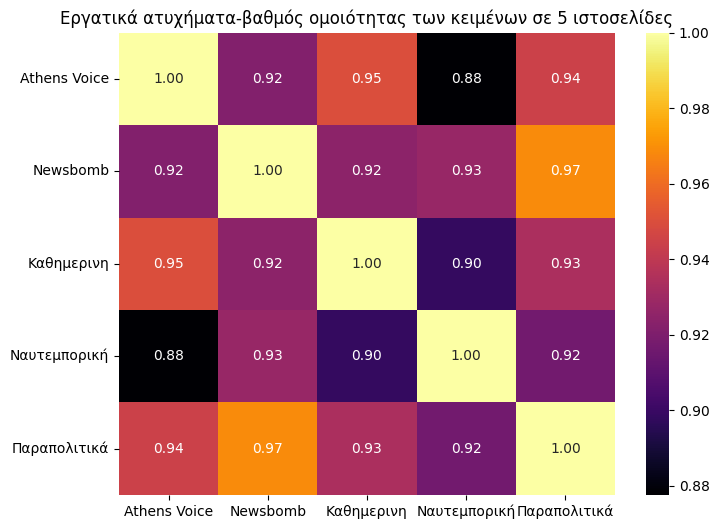

In [ ]:
all_articles_df = pd.concat([ paradf, avdf, nbdf, ktdf, nfdf], ignore_index=True)

combined_text_by_origin = all_articles_df.groupby('origin')['full_text'].apply(lambda x: ' '.join(x.astype(str)))

combined_text_df = combined_text_by_origin.reset_index()
combined_text_df.columns = ['origin', 'combined_text']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_origins = TfidfVectorizer()

tfidf_matrix_origins = tfidf_vectorizer_origins.fit_transform(combined_text_df['combined_text'])

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_origins = cosine_similarity(tfidf_matrix_origins)


similarity_df_origins = pd.DataFrame(similarity_matrix_origins, index=combined_text_df['origin'], columns=combined_text_df['origin'])

# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df_origins, annot=True, cmap='inferno', fmt=".2f")
plt.title('Εργατικά ατυχήματα-βαθμός ομοιότητας των κειμένων σε 5 ιστοσελίδες')
plt.xlabel('')
plt.ylabel('')
plt.show()